# Linear Regression with Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Contents**

- [Gradient Descent](#1.-Gradient-Descent)
- [Linear Regression with Gradient Descent](#2.-Linear-Regression-with-Gradient-Descent)
- [Example](#3.-Example)
- [Gradient Descent step-by-step](#4.-Gradient-Descent-step-by-step)
- [Implementation of Gradient Descent](5.-Implementation-of-Gradient-Descent)
- [Stochastic Gradient Descent](#6.-Stochastic-Gradient-Descent)
- [Adding a Learning Schedule](#7.-Adding-a-Learning-Schedule)

## 1. Gradient Descent

**Gradient descent** is a name for a generic class of algorithms which minimize a function. 
These algorithms achieve this end by starting with initial parameter values and iteratively moving towards a set of parameter values that minimize some cost function or metric (that's the descent part).
The movement toward best-fit is achieved by taking the derivative of the variable or variables involved, towards the direction with the lowest gradient (that's the gradient part).

Gradient descent is based on the observation that a multi-variable function $F(x)$ decreases fastest if one goes moves  in the direction of the negative gradient of $F(x)$.

**Gradient Descent iteration:**

$$
x_n = x_{n-1} - s \nabla F(x_{n-1}),
$$

where the parameter $s$ is known as the learning rate.

**Remark**:  A good (or good enough) learning rate must be discovered via trial and error.

Linear Regression is a good and simple way of demonstrating how gradient descent works.

## 2. Linear Regression with Gradient Descent

To fit a linear (or polynomial) regression model to the data we need to find the vector $\theta$ that minimizes

$$
\mbox{MSE}(\theta) = \frac{1}{m}\| y - X\theta \|_2^2,
$$

where $m$ is the size of the dataset.

To implement Gradient Descent, we need the gradient of the MSE function:

$$
\nabla\, \mbox{MSE}(\theta) = \frac{2}{m} \, X^T(X\theta - y).
$$

The **Gradient Descent iteration**  is:

$$
\theta_n = \theta_{n-1} - \frac{2s}{m} \, X^T(X\theta_{n-1}-y),
$$
where $s$ is called the **learning rate**.

## 3. Example

![](grad_des_anim.gif)

## 4. Gradient Descent step-by-step

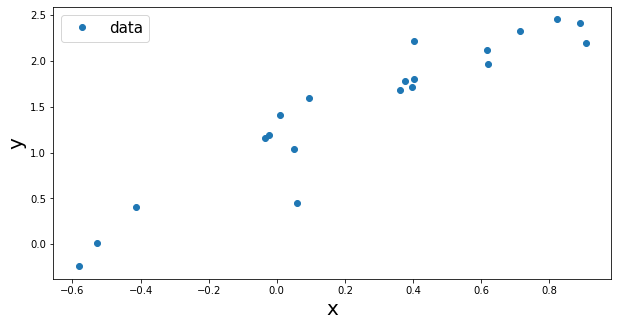

In [3]:
# generate and plot a toy dataset
m = 20 # number of points
x = -1 + 2*np.random.rand(m) # m random points over the interval [-1,1]
y = 2*x+1+0.25*np.random.randn(m) # y = 2x+1 + random noise
plt.figure(figsize=(10,5)) 
plt.plot(x,y,'o', label='data')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.legend(fontsize=15, loc='upper left')

Let's look at a quick implementation of the Gradient Descent method. 

In [4]:
m = len(x) # number of datapoints

In [5]:
X = np.ones((m,2)) # matrix X
X[:,1] = x
s = 0.1 # learning rate

Text(0.5, 1.0, 'MSE = 0.11324315613540104')

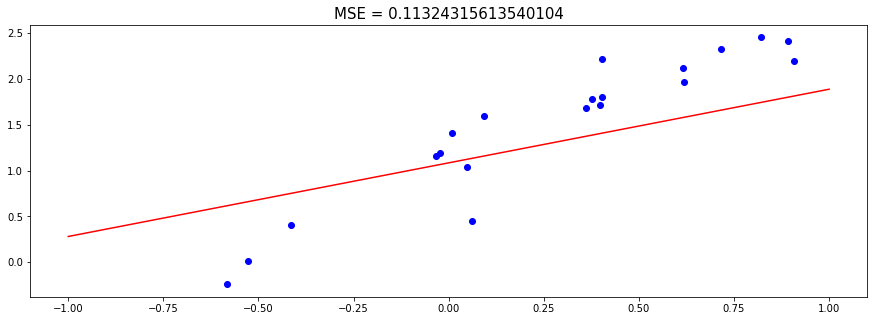

In [8]:
# Initialization:
theta = np.random.randn(2) # theta randomly chosen

# initial mean squared error
MSE = np.linalg.norm(X.dot(theta)-y)/m

#plot the data 
plt.figure(figsize=(15,5))
plt.plot(x,y,'bo')

# plot the linear regression model
m_plot = 100
x_plot = np.linspace(-1,1,100)
X_plot = np.ones((m_plot,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

Text(0.5, 1.0, 'MSE = 0.10615675995761945')

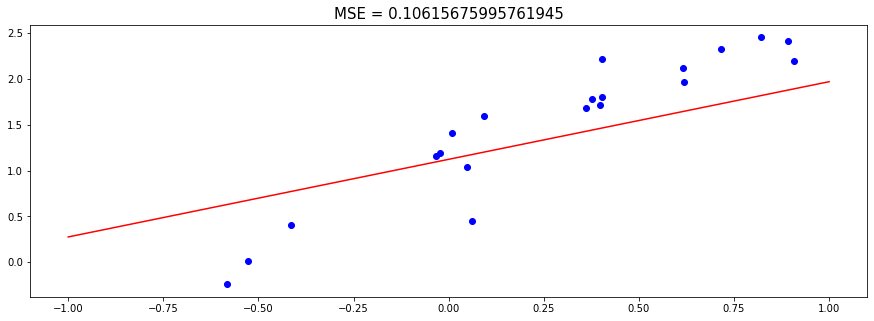

In [9]:
# Gradient Descent Step
gradient = (2/m)*X.T.dot(X.dot(theta)-y)
theta = theta - s*gradient

# Mean squared error
MSE = np.linalg.norm(X.dot(theta)-y)/m

#plot the data 
plt.figure(figsize=(15,5))
plt.plot(x,y,'bo')

# plot the linear regression model
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

**Warning:**

- if the learning rate is too small: convergence will take a long time
- If the learning rate is too large,  the algorithm may diverge.

The best way to determine the correct learning rate is by trial and error.

## 5. Implementation of Gradient Descent

In [11]:
def linregression_GD(X,y,learning_rate, n_epochs = 100, return_MSE=False):
    '''
    linear regression with Gradient Descent
    
    INPUT: 
    - the matrix X
    - the vector y
    - learning rate
    - epochs: number of Gradient Descent iterations (defualt 100)
    - return_MSE: if True, it returs the mse at each iteration (default False)
    
    OUTPUT:
    - the vector theta
    - MSE: error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    theta = np.random.randn(n) # random initialization
    
    # initialize MSE vector (only if retur_MSE = True)
    if return_MSE:
        MSE = np.zeros(n_epochs)
    
    # gradient descent iterations
    for epoch in range(n_epochs):
        gradient = (2/m)*X.T.dot(X.dot(theta)-y) # gradient of the mse function
        theta = theta - learning_rate*gradient # update the vector theta
        # compute mean squared error (only if retur_MSE = True)
        if return_MSE:
            MSE[epoch] = np.linalg.norm(y-X.dot(theta))**2/m
            
    return theta, MSE if return_MSE else theta

Text(0.5, 0, 'epoch')

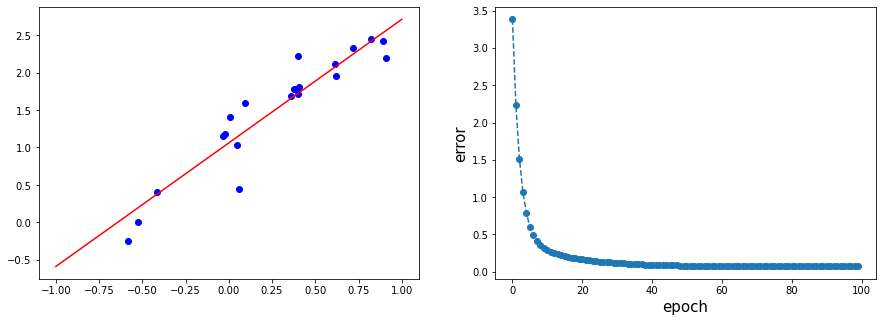

In [18]:
# check that the function works
theta, MSE = linregression_GD(X,y,learning_rate=0.1,n_epochs=100, return_MSE=True)


plt.figure(figsize=(15,5))
# plot data + fitted line
plt.subplot(1,2,1)
plt.plot(x,y,'bo')
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

# plot the mean squared error as a function of the number of iterations
plt.subplot(1,2,2)
plt.plot(MSE,'o--')
plt.ylabel('error',fontsize=15)
plt.xlabel('epoch',fontsize=15)

## 6. Stochastic Gradient Descent

**Stochastic gradient descent** is a modification of gradient descent. In stochastic gradient descent, you calculate the gradient using just a random small part of the observations instead of all of them. In some cases, this approach can reduce computation time.

In [33]:
def linregression_SGD(X,y,learning_rate, n_epochs = 100, batch_size=10, return_MSE=False):
    '''
    Version 1
    linear regression with Stochastic Gradient Descent
    
    INPUT: 
    - the matrix X
    - the vector y
    - learning rate
    - n_epochs: number of Stochastic Gradient Descent iterations (defualt 100)
    - batch_size: minibatch size (default 1)
    - return_MSE: if True, it returs the mse at each iteration (default False)
    
    OUTPUT:
    - the vector theta
    - MSE: error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    
    theta = np.random.randn(n) # random initialization
    
    # initialize MSE vector (only if retur_MSE = True)
    if return_MSE:
        MSE = np.zeros(n_epochs)
    
    #  stochastic gradient descent iterations
    for epoch in range(n_epochs):
        # Randomly shuffle the data
        shuffled_indices = np.random.permutation(m) 
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # stochastic gradient descent steps
        for i in range(0, m, batch_size):  
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)                
            theta = theta - learning_rate*gradient # update the vector theta
            
        # compute mean squared error (only if retur_MSE = True)
        if return_MSE:
            MSE[epoch] = np.linalg.norm(y-X.dot(theta))**2/m
            
    return theta, MSE if return_MSE else theta

Text(0.5, 0, 'epoch')

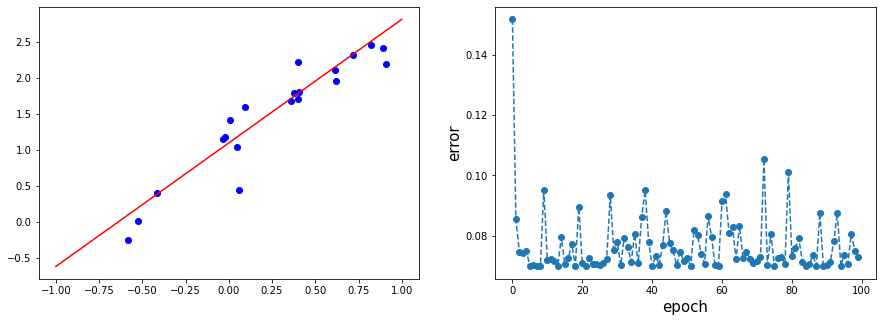

In [34]:
# check that the function works
theta, MSE = linregression_SGD(X,y,learning_rate=0.1,n_epochs=100, batch_size=1, return_MSE=True)


plt.figure(figsize=(15,5))
# plot data + fitted line
plt.subplot(1,2,1)
plt.plot(x,y,'bo')
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

# plot the mean squared error as a function of the number of iterations
plt.subplot(1,2,2)
plt.plot(MSE,'o--')
plt.ylabel('error',fontsize=15)
plt.xlabel('epoch',fontsize=15)

## 7. Adding a Learning Schedule

Stochastic Gradient Descent is much less regular than Gradient Descent. 
Instead of gently decreasing until it reaches the minimum, the MSE cost function bounces up and down, decreasing only on average.

One solution is to gradually reduce the learning rate.
The formula

$$
s(t) = \frac{s_0}{1+s_1t}
$$

ensures that the learning rates start from a predefined value $s_0$ and asymptotically decrease like $\frac{s_0}{s_1t}$.

In [67]:
1/50

0.02

In [75]:
s0,s1 = 0.1, 0.02 #learning hyperparameters (choosing these parameters is tricky)
def learning_schedule(t):
    return s0/(1+s1*t)

Text(0.5, 1.0, 'learning rate schedule')

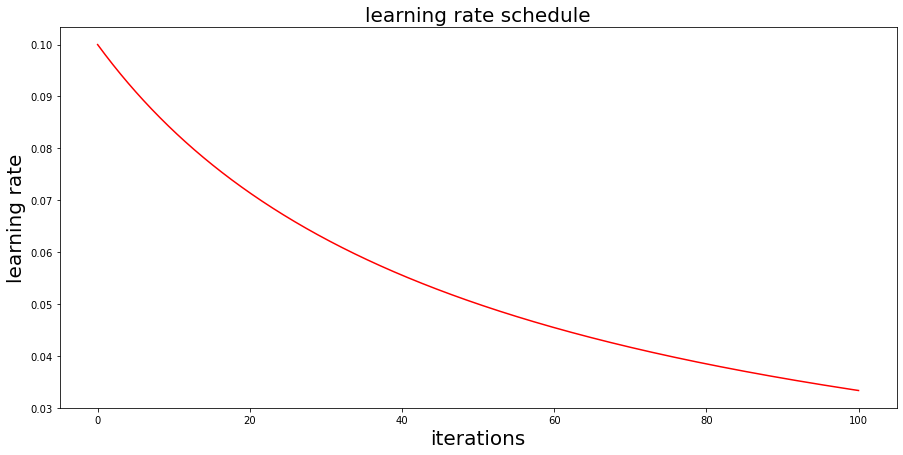

In [81]:
# plot learning schedule function
t_plot = np.linspace(0,100,1000)
f_plot = learning_schedule(t_plot)

plt.figure(figsize=(15,7))
plt.plot(t_plot,f_plot,'r-')
plt.xlabel('iterations',fontsize=20)
plt.ylabel('learning rate',fontsize=20)
plt.title('learning rate schedule',fontsize=20)

In [82]:
def linregression_SGD_V2(X,y,learning_schedule, n_epochs = 100, batch_size=10, return_MSE=False):
    '''
    Version 2
    linear regression with Stochastic Gradient Descent. This implementation uses a learning schedule function
    
    INPUT: 
    - the matrix X
    - the vector y
    - learning schedule: learning schedule function
    - n_epochs: number of Stochastic Gradient Descent iterations (defualt 100)
    - batch_size: minibatch size (default 1)
    - return_MSE: if True, it returs the mse at each iteration (default False)
    
    OUTPUT:
    - the vector theta
    - MSE: error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    
    theta = np.random.randn(n) # random initialization
    
    # initialize MSE vector (only if retur_MSE = True)
    if return_MSE:
        MSE = np.zeros(n_epochs)
    
    #  stochastic gradient descent iterations
    t = 0
    for epoch in range(n_epochs):
        # shuffle X and y 
        shuffled_indices = np.random.permutation(m) 
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # stochastic gradient descent steps
        for i in range(0, m, batch_size):  
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            learning_rate = learning_schedule(t)
            gradient = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)                
            theta = theta - learning_rate*gradient # update the vector theta
            t += 1
        # compute mean squared error (only if retur_MSE = True)
        if return_MSE:
            MSE[epoch] = np.linalg.norm(y-X.dot(theta))**2/m
            
    return theta, MSE if return_MSE else theta

Text(0.5, 0, 'epoch')

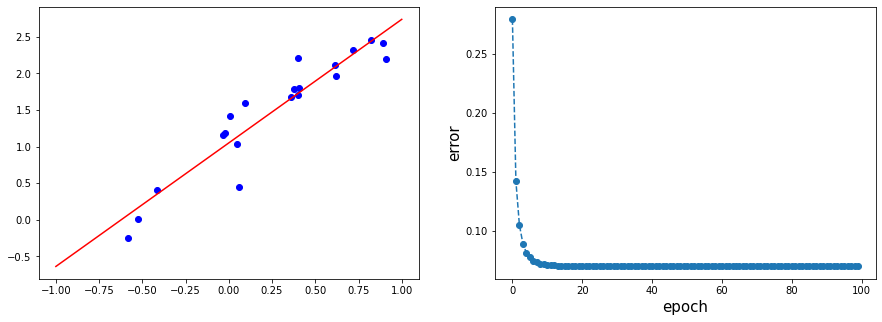

In [83]:
# check that the function works
theta, MSE = linregression_SGD_V2(X,y,learning_schedule = learning_schedule ,n_epochs=100, batch_size=1, return_MSE=True)


plt.figure(figsize=(15,5))
# plot data + fitted line
plt.subplot(1,2,1)
plt.plot(x,y,'bo')
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

# plot the mean squared error as a function of the number of iterations
plt.subplot(1,2,2)
plt.plot(MSE,'o--')
plt.ylabel('error',fontsize=15)
plt.xlabel('epoch',fontsize=15)